<a href="https://colab.research.google.com/github/Vidcito/Metodos_Numericos/blob/main/CubicSpline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

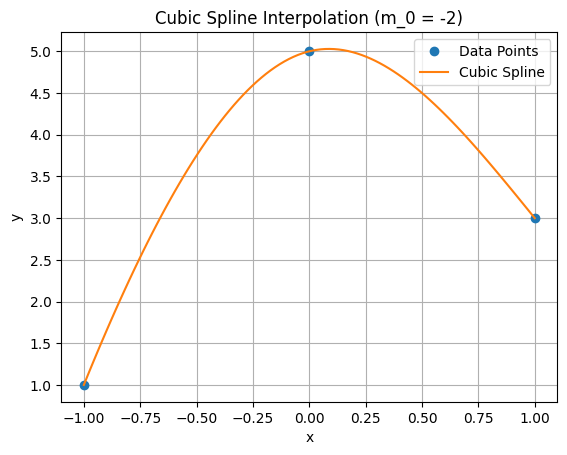

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_spline(x, y, m_0=-2):
    n = len(x)
    h = np.diff(x)
    alpha = np.zeros(n - 1)
    for i in range(1, n - 1):
        alpha[i] = (3 / h[i]) * (y[i + 1] - y[i]) - (3 / h[i - 1]) * (y[i] - y[i - 1])

    l = np.zeros(n)
    mu = np.zeros(n)
    z = np.zeros(n)
    l[0] = 1
    mu[0] = 0
    z[0] = m_0  # Use the specified initial slope m_0

    for i in range(1, n - 1):
        l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n - 1] = 1
    z[n - 1] = 0
    c = np.zeros(n)
    b = np.zeros(n)
    d = np.zeros(n)
    for j in range(n - 2, -1, -1):
        c[j] = z[j] - mu[j] * c[j + 1]
        b[j] = (y[j + 1] - y[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])

    def spline(x_val):
      for i in range(n - 1):
        if x[i] <= x_val <= x[i + 1]:
          return y[i] + b[i] * (x_val - x[i]) + c[i] * (x_val - x[i])**2 + d[i] * (x_val - x[i])**3
      return None
    return spline


# Given points
x = np.array([-1, 0, 1])
y = np.array([1, 5, 3])

# Calculate the spline with the specified initial slope m_0 = -2
spline_func = cubic_spline(x, y)

# Generate points for plotting
x_plot = np.linspace(min(x), max(x), 100)
y_plot = [spline_func(val) for val in x_plot]
y_plot = np.array(y_plot)


# Plot the results
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x_plot, y_plot, label='Cubic Spline')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation (m_0 = -2)')  # Update the title
plt.legend()
plt.grid(True)
plt.show()